$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 1: Linear Regression

*by Vignesh M. Pagadala*

## Overview

In this assignment, we attempt to formulate a linear model for a dataset. We have at our disposal a dataset containing many instances of inputs and the corresponding, target outputs for each input data sample. We achieve this by trying to arrive at the suitable weight for each feature (which we think might influence the target). Obviously, the most optimum (best) set of weights would be one for which the sum of the squared errors is the lowest, and hence, we try to find those weights for which the error is the least.

We look into two ways of doing this:
    1. By using simple calculus.
    2. By using Stochastic Gradient Descent. 

## Method

We first look into, how the error function can be expressed mathematically. The error function which we need to minimize is represented as:
$$
\begin{align*}
\sum_{n=1}^N (t_n - g(\xv_n;\wv))^2
\end{align*}
$$
where $t_n$, $x_n$, $w$ and $N$ represent the target data, the input data, weight and number of samples respectively.

We can find the best $w$ to minimize the above equation by taking the partial derivative with respect to $w$ and equating it to zero. Doing this we get,

$$
\begin{align*}
\frac{\partial \sum_{n=1}^N (\tv_n - g(\xv_n;\wv))^2}{\partial \wv} 
&= -2 \sum_{n=1}^N (\tv_n - \xv_n^T \wv) \xv_n^T\\
\end{align*}
$$

To speeden up the process, it would be to our advantage if we can perform this summation through the use of matrices (in Python). Therefore, the above expression can be stated in terms of matrices as,

$$
\begin{align*}
& -2 \Xv^T (\Tv - \Xv \wv)
\end{align*}
$$

Equating this to zero and solving for $w$ gives us,

$$
\begin{align*}
\wv &= (\Xv^T \Xv)^{-1} \Xv^T \Tv
\end{align*}
$$

The following functions are defined in the cells below:
1. train: Takes two parameters X and T, where X is the input data and T is the target data. Standardizes the input data and returns a dictionary with the keys ```means```, ```stds```, ```w```. 
2. use: Takes in the parameters model (dictionary with the keys as returned by train) and X (target input data). Prediction is done in this function using the input data and the model.
3. error: Computes the root-mean-squared error between the predicted and target values, and returns the same.
4. trainSGD: Computes the optimum weights using Stochastic Gradient Descent, and returns a dictionary of the same type as the train function.

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. train

In [3]:
def train(X, T):
    # Standardize input data (X)

    # Calculate mean and std.
    means = X.mean(axis = 0)
    std = X.std(axis = 0)

    Xs = (X - means) / std

    # Tack a column of 1s
    Xs = np.insert(Xs, 0, 1, 1)

    # Use Xs to generate model (w)
    w = np.linalg.lstsq(Xs.T @ Xs, Xs.T @ T, rcond = None)[0]

    # Return as a dictionary
    dict = {'means': means, 'stds': std, 'w': w}
    return dict

## 2. use

In [4]:
def use(model, X):
    # Use model and input X to predict.
    means = model['means']
    std = model['stds']
    w = model['w']

    # Standardize X
    Xs = (X - means) / std

    # Tack column of 1s
    Xs = np.insert(Xs, 0, 1, 1)

    # Predict
    predict = Xs @ w
    return predict

## 3. rmse

In [5]:
def rmse(predict, T):
    rmerr = np.sqrt(np.mean((T - predict) ** 2))
    return rmerr

# Stochastic Gradient Descent
In some cases, where the number of data samples are very large, the above methodology of finding the optimum weights might be a very time-consuming process. However, there's a way by which, we can do this in a sequnetial manner, where instead of trying to find the summation over the entire dataset, we may just calculate the squared-error-derivative for each sample, and accordingly update the weight.

This can be visualized by considering the squared-error-function curve, where the objective is to get to the lowest point of this curve (to get minimum error). At each point, we determine the derivative, and make a small move towards the direction of the negative gradient, like a ball rolling downhill.

The weight-update to be done at each point can be mathematically represented as,

$$
\begin{align*}
\wv^{(k+1)} &= \wv^{(k)} + \eta \xv_n (\tv_n^T - \xv_n^T  \wv) 
\end{align*}
$$

## 4. trainSGD

In [6]:
def trainSGD(X, T, learningRate, numberOfIterations):
    # Standardize inputs X.
    means = X.mean(axis = 0)
    std = X.std(axis = 0)
    Xs = (X - means) / std

    nSamples = Xs.shape[0]
    ncolsT = T.shape[1]

    # Tack a column of 1s
    Xs = np.insert(Xs, 0, 1, 1)
    ncolsX = Xs.shape[1]
    # Initialize weights to zero.
    w = np.zeros((ncolsX, ncolsT))

    # SGD training
    for i in range(numberOfIterations):
        for n in range(nSamples):
            predicted = Xs[n:n+1, :] @ w
            w += learningRate * Xs[n:n+1, :].T * (T[n:n+1, :] - predicted)

    dict = {'means': means, 'stds': std, 'w': w}
    return dict

## Examples

In [7]:
import numpy as np

X = np.arange(10).reshape((5,2))
T = X[:,0:1] + 2 * X[:,1:2] + np.random.uniform(-1, 1,(5, 1))
print('Inputs')
print(X)
print('Targets')
print(T)

Inputs
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
Targets
[[ 2.25623779]
 [ 7.61913025]
 [14.19777011]
 [19.06573414]
 [26.46309954]]


In [8]:
model = train(X, T)
model

{'means': array([4., 5.]),
 'stds': array([2.82842712, 2.82842712]),
 'w': array([[13.92039437],
        [ 4.23276434],
        [ 4.23276434]])}

In [9]:
predicted = use(model, X)
predicted

array([[ 1.94832889],
       [ 7.93436163],
       [13.92039437],
       [19.9064271 ],
       [25.89245984]])

In [10]:
rmse(predicted, T)

0.5105899213196533

In [11]:
modelSGD = trainSGD(X, T, 0.01, 100)
modelSGD

{'means': array([4., 5.]),
 'stds': array([2.82842712, 2.82842712]),
 'w': array([[13.8373292 ],
        [ 4.23781651],
        [ 4.23781651]])}

In [12]:
predicted = use(modelSGD, X)
predicted

array([[ 1.85097403],
       [ 7.84415162],
       [13.8373292 ],
       [19.83050678],
       [25.82368436]])

In [13]:
rmse(predicted, T)

0.517401186297288

## Data - Appliances Energy Prediction Data Set
Source: Luis Candanedo, luismiguel.candanedoibarra '@' umons.ac.be, University of Mons (UMONS). 

This dataset, recorded by Luis Candanedo from the University of Mons, basically reflects the energy-usage of appliances and lights in a house with low energy usage, monitored at 10-minute intervals over a period of four and a half months, which affords us a total of 19735 data samples. 
The temperature and humidity were recorded using a ZigBee wireless network of sensors, where each sensor pushed the observed data every 3.3 minutes, which was then averaged over a 10 minute period. For recording the energy output (of the appliances and lights), m-bus energy meters were used to grab the values every 10 minutes. The weather-related data was taken from a weather station nearby.   

We use the applicances and lights' energy data (2nd and 3rd columns) as the target data, and the remaining columns (excluding the last two columns) and input data. This gives us 24 features as input and 2 features as the desired target outputs, each containing 19735 samples.

Firstly, let's load the data and split it into input and target variables.

In [14]:
# Load the csv data.
dframe=pd.read_csv('energydata_complete.csv', sep=',',header=None)
# Filter out required columns.
dframe = dframe.drop(dframe.columns[[0, -2, -1]], axis=1)
# Input data columns
Xlabels = []
Xl = dframe.iloc[0, 2:]
for i in Xl:
    Xlabels.append(i)
# Target data columns
Tlabels = []
Tl = dframe.iloc[0, :2]
for i in Tl:
    Tlabels.append(i)

# Get target.
Td = dframe.iloc[1:, [0,1]]
Td = Td.as_matrix()
Tenergy = Td.astype(float)

# Get input.
Xd = dframe.iloc[1:, 2:]
Xd = Xd.as_matrix()
Xenergy = Xd.astype(float)

Let's take a look at the data and see if a linear relationship exists between some input and target variables. 

One possible relationship which might exist would be between the outside temperature and appliance energy usage. Let's see if this exists.

In [15]:
tempOut = Xenergy[:, 18]
tempOut[:10]

array([6.6       , 6.48333333, 6.36666667, 6.25      , 6.13333333,
       6.01666667, 5.9       , 5.91666667, 5.93333333, 5.95      ])

In [16]:
appEnergy = Tenergy[:, 0]
appEnergy[:10]

array([60., 60., 50., 50., 60., 50., 60., 60., 60., 70.])

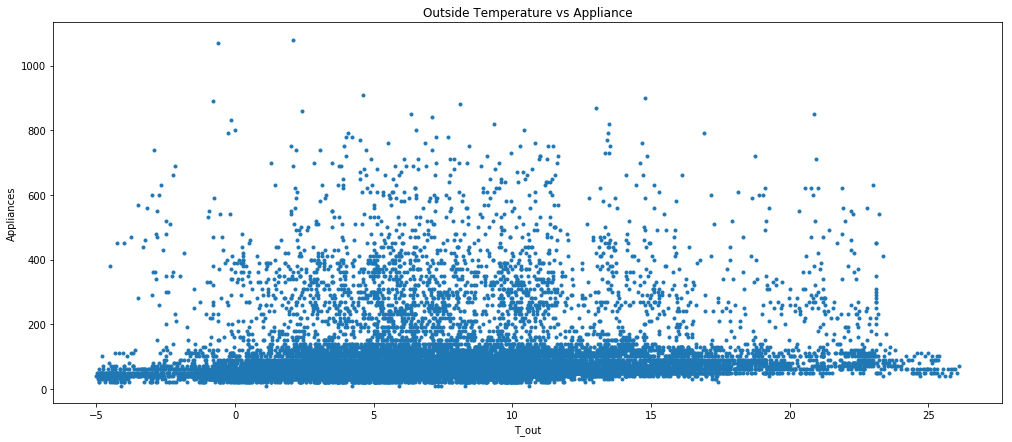

In [17]:
fig = plt.figure(figsize = (17, 7))
ax = fig.add_subplot(111)
ax.scatter(tempOut, appEnergy, marker = '.')
ax.set(xlabel = Xlabels[18], ylabel = Tlabels[0], title = "Outside Temperature vs Appliance")
plt.show()

Doesn't seem like a linear relationship to me. Let's try some other combinations of inputs and targets.

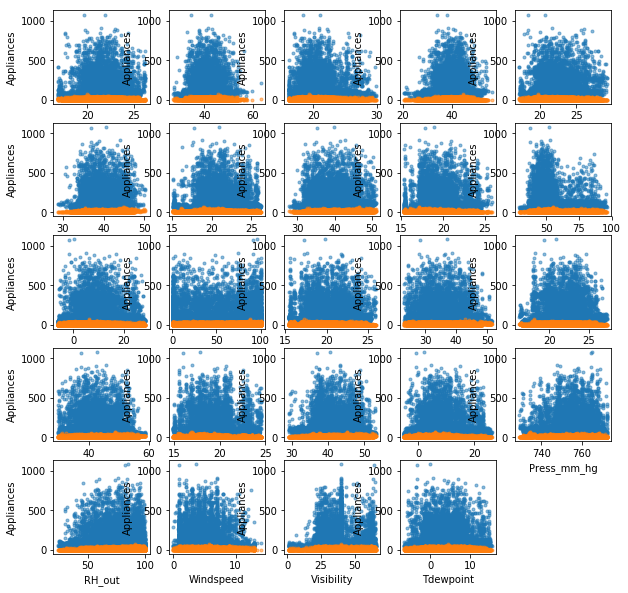

In [18]:
plt.figure(figsize=(10, 10))
for c in range(Xenergy.shape[1]):
    plt.subplot(5,5, c+1)
    plt.plot(Xenergy[:, c], Tenergy, '.', alpha=0.5)
    plt.ylabel(Tlabels[0])
    plt.xlabel(Xlabels[c])

None of these seem like linear relationships. We may be able to fit a linear model to this data, but our predictions are probably not going to be very accurate.

## Results

Let's apply our fuctions to this data. But before that let's split the data into training (80 %) and testing (20 %) datasets.

In [19]:
# Split into training (80 %) and testing data (20 %).
nRows = Xenergy.shape[0]
nTrain = int(round(0.8*nRows)) 
nTest = nRows - nTrain

# Shuffle row numbers
rows = np.arange(nRows)
np.random.shuffle(rows)

trainIndices = rows[:nTrain]
testIndices = rows[nTrain:]

Xtrain = Xenergy[trainIndices, :]
Ttrain = Tenergy[trainIndices, :]
Xtest = Xenergy[testIndices, :]
Ttest = Tenergy[testIndices, :]

Now, let's apply our functions.

In [20]:
# Use functions to predict.

# 1. Using first function.
model = train(Xtrain, Ttrain)
predict = use(model, Xtest)
rmerr = rmse(predict, Ttest)

# 2. Using the second function.
model2 = trainSGD(Xtrain, Ttrain, 0.01, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)

In [21]:
rmerr

68.54790050135675

In [22]:
rmerr2

71.74438444771478

In [23]:
model2 = trainSGD(Xtrain, Ttrain, 0.001, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)
rmerr2

68.65755124653663

In [24]:
model2 = trainSGD(Xtrain, Ttrain, 0.005, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)
rmerr2

69.12730151311757

In [25]:
model2 = trainSGD(Xtrain, Ttrain, 0.0001, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)
rmerr2

68.56483403191956

In [26]:
model2 = trainSGD(Xtrain, Ttrain, 0.02, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)
rmerr2

83.51248432501947

In [27]:
model2 = trainSGD(Xtrain, Ttrain, 0.04, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)
rmerr2

97.6451802531917

In [28]:
model2 = trainSGD(Xtrain, Ttrain, 0.05, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)
rmerr2

155.93202650661775

The RMSE values become flat at around 68, at values lesser than a learning rate of 0.01. Anything higher than this value seems to make the RMSE shoot up to high values. At 0.05 it goes up to around 166. 

Let's plot the predicted and actual energy values for a learning rate of 0.01. 

In [29]:
model2 = trainSGD(Xtrain, Ttrain, 0.01, 100)
predict2 = use(model2, Xtest)
rmerr2 = rmse(predict2, Ttest)

For the following plots: green - predicted and red - actual values.

c:\users\vigne\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


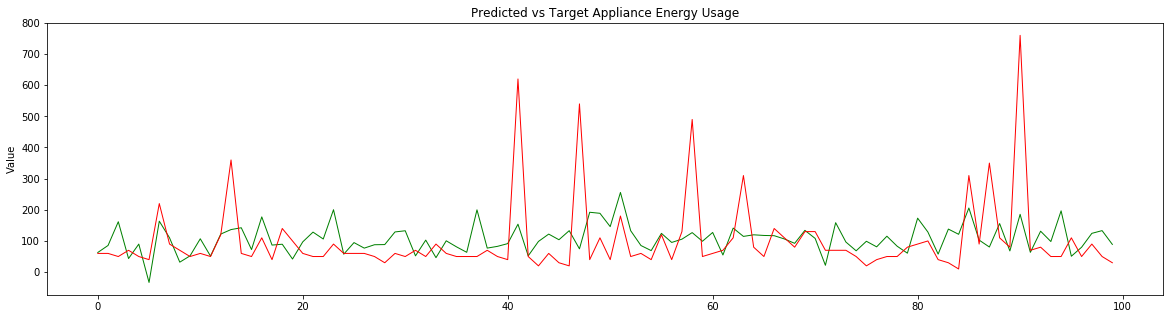

In [30]:
figt = plt.figure(figsize = (20, 5))
axt = figt.add_subplot(111)
axt.plot(predict2[:100, 0], linewidth = 1, color = 'g')
axt.set(title = 'Predicted vs Target Appliance Energy Usage', ylabel = "Value")
# Target
axt2 = figt.add_subplot(111)
axt2.plot(Ttest[:100, 0], linewidth = 1, color = 'r')
plt.show()

It can be seen in some areas that it does seem to be making good predictions (at around the 5th sample or so). The predictions don't seem to be very accurate.

c:\users\vigne\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


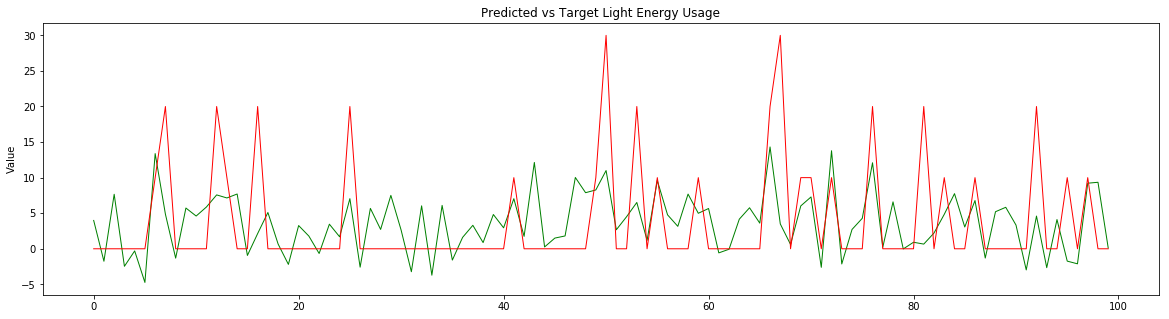

In [31]:
figt = plt.figure(figsize = (20, 5))
axt = figt.add_subplot(111)
axt.plot(predict2[:100, 1], linewidth = 1, color = 'g')
axt.set(title = 'Predicted vs Target Light Energy Usage', ylabel = "Value")
# Target
axt2 = figt.add_subplot(111)
axt2.plot(Ttest[:100, 1], linewidth = 1, color = 'r')
plt.show()

Likewise, the light energy prediction is'nt that accurate either. But in same places, we can see the algorithm making pretty accurate matches like in the first 10 observations, and also just after the 60th observation. 

For the first model.

Appliance Energy

c:\users\vigne\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


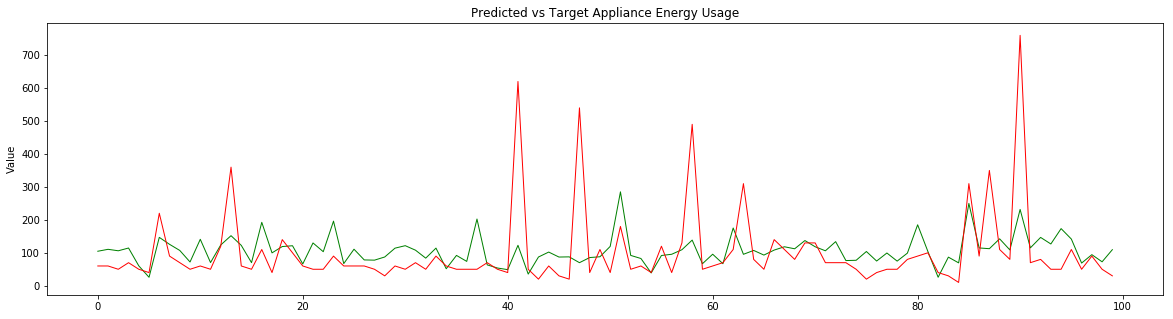

In [34]:
# 1. Using first function.
model = train(Xtrain, Ttrain)
predict = use(model, Xtest)

figt = plt.figure(figsize = (20, 5))
axt = figt.add_subplot(111)
axt.plot(predict[:100, 0], linewidth = 1, color = 'g')
axt.set(title = 'Predicted vs Target Appliance Energy Usage', ylabel = "Value")
# Target
axt2 = figt.add_subplot(111)
axt2.plot(Ttest[:100, 0], linewidth = 1, color = 'r')
plt.show()

For the light energy

c:\users\vigne\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


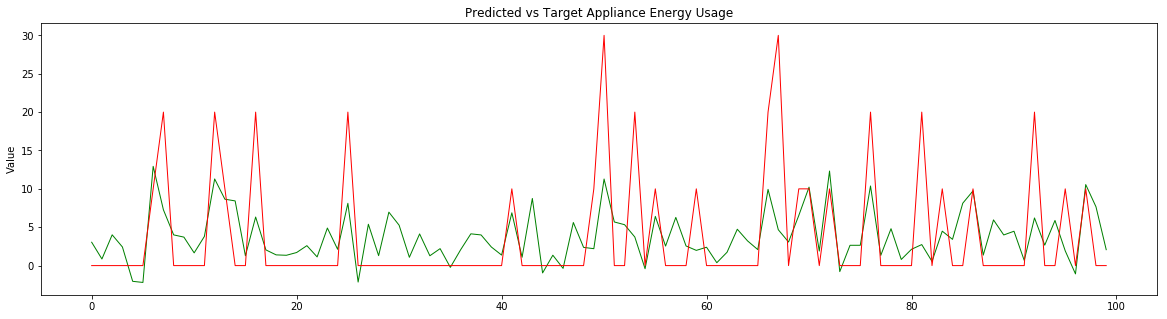

In [35]:
# 1. Using first function.
model = train(Xtrain, Ttrain)
predict = use(model, Xtest)

figt = plt.figure(figsize = (20, 5))
axt = figt.add_subplot(111)
axt.plot(predict[:100, 1], linewidth = 1, color = 'g')
axt.set(title = 'Predicted vs Target Appliance Energy Usage', ylabel = "Value")
# Target
axt2 = figt.add_subplot(111)
axt2.plot(Ttest[:100, 1], linewidth = 1, color = 'r')
plt.show()

Let's check out the weights assigned to each attribute for the first model and see if we can eliminate any of them.

### Model 1

In [56]:
Xtraintest = np.insert(Xtrain, 0, 1, 1)
w = np.linalg.lstsq(Xtraintest.T @ Xtraintest, Xtraintest.T @ Ttrain, rcond = None)
w = w[0] # to only keep the weights, and discard other information returned by lstsq
w

array([[ 7.80974449e+01, -6.07655497e-01],
       [-1.61234856e-02,  5.53128355e-01],
       [ 1.54761236e+01,  4.82696739e-01],
       [-2.05748775e+01, -1.36407347e+00],
       [-1.43638304e+01, -4.74260113e-01],
       [ 2.56794207e+01, -4.29545712e-03],
       [ 5.07907132e+00,  8.00397630e-02],
       [ 3.46095174e+00,  3.29884447e+00],
       [ 2.07460555e+00,  1.05087971e+00],
       [ 5.32434130e-02,  4.27245640e-02],
       [ 2.49928353e-01,  4.83285259e-02],
       [ 8.27476584e+00,  2.90171997e-01],
       [ 3.91838850e-01,  3.34458179e-02],
       [ 7.03110919e-01, -3.20005120e-01],
       [-1.46942253e+00, -1.70036786e-01],
       [ 1.03909174e+01,  9.40993893e-01],
       [-5.92770336e+00, -6.24818477e-01],
       [-2.20899024e+01, -3.17333184e+00],
       [-1.51070566e+00, -2.88981014e-01],
       [-1.16781175e+01, -2.48972109e-01],
       [ 9.19108934e-02, -1.72550714e-02],
       [-1.12768504e+00,  6.98869429e-02],
       [ 1.93964530e+00,  2.04565059e-01],
       [ 1.

In [57]:
for weights,name in zip(w.flat, Xlabels):
    print('{:8.3f}  {:s}'.format(weights, name))

  78.097  T1
  -0.608  RH_1
  -0.016  T2
   0.553  RH_2
  15.476  T3
   0.483  RH_3
 -20.575  T4
  -1.364  RH_4
 -14.364  T5
  -0.474  RH_5
  25.679  T6
  -0.004  RH_6
   5.079  T7
   0.080  RH_7
   3.461  T8
   3.299  RH_8
   2.075  T9
   1.051  RH_9
   0.053  T_out
   0.043  Press_mm_hg
   0.250  RH_out
   0.048  Windspeed
   8.275  Visibility
   0.290  Tdewpoint


But we know that, the range of the variables might also affect the weight. So let's look at the same after standardization.

In [58]:
Xcopy = Xtrain
meansX = Xcopy.mean(axis = 0)
stdX = Xcopy.std(axis = 0)
Xstd = (Xcopy - meansX) / stdX

In [59]:
Xtraintest = np.insert(Xcopy, 0, 1, 1)
w = np.linalg.lstsq(Xcopy.T @ Xcopy, Xcopy.T @ Ttrain, rcond = None)
w = w[0] # to only keep the weights, and discard other information returned by lstsq
w

array([[-3.28765921e-02,  5.53258706e-01],
       [ 1.55000885e+01,  4.82510274e-01],
       [-2.05204511e+01, -1.36449694e+00],
       [-1.43172574e+01, -4.74622485e-01],
       [ 2.57208325e+01, -4.61767157e-03],
       [ 5.13484032e+00,  7.96058392e-02],
       [ 3.38135890e+00,  3.29946376e+00],
       [ 2.03491827e+00,  1.05118851e+00],
       [-2.83048845e-02,  4.33590697e-02],
       [ 2.53434585e-01,  4.83012448e-02],
       [ 8.32354053e+00,  2.89792494e-01],
       [ 3.96791739e-01,  3.34072808e-02],
       [ 5.88687153e-01, -3.19114819e-01],
       [-1.42161829e+00, -1.70408738e-01],
       [ 1.05530594e+01,  9.39732309e-01],
       [-5.93353969e+00, -6.24773067e-01],
       [-2.18338206e+01, -3.17532435e+00],
       [-1.56331718e+00, -2.88571658e-01],
       [-1.13386283e+01, -2.51613585e-01],
       [ 1.73892859e-01, -1.78929513e-02],
       [-1.04265296e+00,  6.92253308e-02],
       [ 2.03906589e+00,  2.03791494e-01],
       [ 1.58279490e-01,  1.11178101e-02],
       [ 5.

In [60]:
for weights,name in zip(w.flat, Xlabels):
    print('{:8.3f}  {:s}'.format(weights, name))

  -0.033  T1
   0.553  RH_1
  15.500  T2
   0.483  RH_2
 -20.520  T3
  -1.364  RH_3
 -14.317  T4
  -0.475  RH_4
  25.721  T5
  -0.005  RH_5
   5.135  T6
   0.080  RH_6
   3.381  T7
   3.299  RH_7
   2.035  T8
   1.051  RH_8
  -0.028  T9
   0.043  RH_9
   0.253  T_out
   0.048  Press_mm_hg
   8.324  RH_out
   0.290  Windspeed
   0.397  Visibility
   0.033  Tdewpoint


If we observe now we can notice that the attributes with the least magnitutde of weights are RH_5, T1, RH_6,RH_9, Press_mm_hg and Tdewpoint. Let's remove these attributes and fit the linear model again.

In [61]:
# Remove columns from Xtrain.
Xtrain2 = Xtrain.drop(['RH_5', 'T1', 'RH_6','RH_9', 'Press_mm_hg', 'Tdewpoint'], axis = 1)
Xtrain2.shape

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

## Grading

Your notebook will be run and graded automatically.  Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A1grader.tar) and extract `A1grader.py` from it. Run the code in the following cell (after deleting the one containing A1mysolution) to demonstrate an example grading session.  You should see a perfect execution score of 70/70 if your functions are defined correctly. The remaining 30 points will be based on the results you obtain from the energy data and on your discussions.

A different, but similar, grading script will be used to grade your checked-in notebook.  It will include additional tests.  You need not include code to test that the values passed in to your functions are the correct form.  

In [33]:
%run -i "A1grader.py"


======================= Code Execution =======================

Extracting python code from notebook and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.
Testing rmse(A, B) with
 A =
[[1 2 3]
 [4 5 6]]
 and B =
[[2 3 4]
 [5 6 7]]

--- 10/10 points. Correctly returned 1.0

Testing model = train(X, T) with
 X=
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [18 20 22]
 [24 26 28]]
 and T=
[[ 0.2  1.2]
 [ 5.   6. ]
 [11.6 12.6]
 [62.  64. ]
 [96.8 98.8]]

--- 5/5 points. Model correctly includes a key named 'means'.

--- 5/5 points. Model correctly includes a key named 'stds'.

--- 5/5 points. Model correctly includes a key named 'w'.

Testing rmse(T, use(model, X))

--- 15/15 points. Error is correctly calculated as 5.242709223292856.

Testing model = trainSGD(X, T, 0.01, 1000) with
 X=
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [18 20 22]
 [24 26 28]]
 and T=
[[ 0.2  1.2]
 [ 5.   6. ]
 [11.6 12.6]
 [62.  64. ]
 [96.8 98.8]]

--- 5/5 points. Mo

## Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/41327).

Grading will be based on 

  * correct behavior of the required functions listed above,
  * easy to understand plots in your notebook,
  * readability of the notebook,
  * effort in making interesting observations, and in formatting your notebook.

## Extra Credit

Download a second data set and repeat all of the steps of this assignment on that data set.